In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv("train.csv")

In [4]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 66.2+ KB


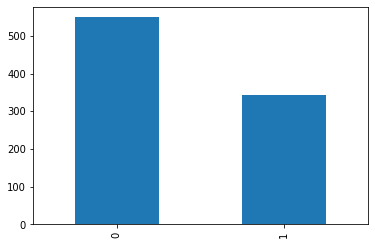

In [6]:

data['Survived'].value_counts().plot(kind="bar")

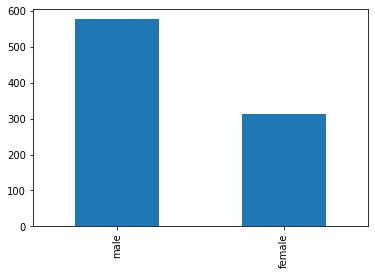

In [7]:
data["Sex"].value_counts().plot(kind="bar")

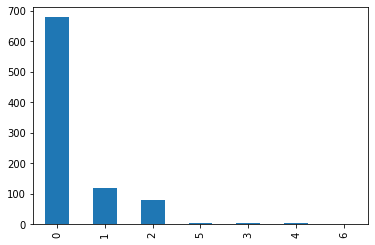

In [8]:
data['Parch'].value_counts().plot(kind="bar")

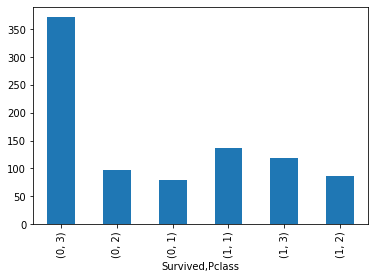

In [9]:
groupof = data.groupby('Survived')['Pclass']
groupof.value_counts().plot(kind="bar")

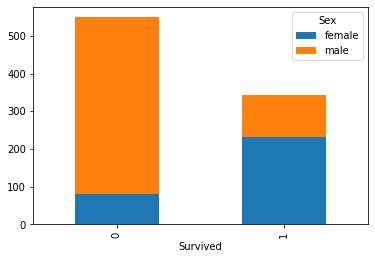

In [10]:
groupof = data.groupby('Survived')['Sex']
groupof.value_counts().unstack().plot(kind="bar",stacked="True")

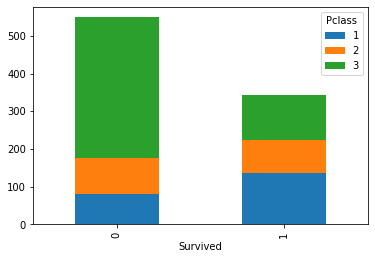

In [11]:
groupof = data.groupby('Survived')['Pclass']
groupof.value_counts().unstack().plot(kind="bar",stacked="True")

# multivariate Analysis

In [12]:
sns.set()

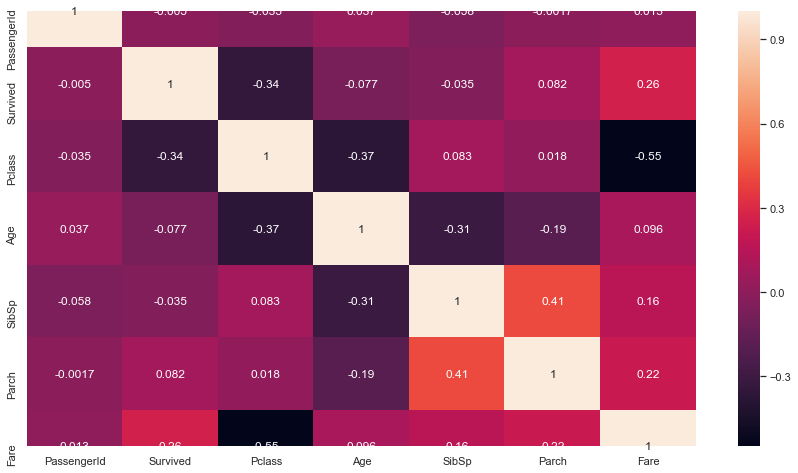

In [13]:
plt.subplots(figsize = (15,8))
sns.heatmap(data.corr(), annot=True)

In [14]:
def convrt(x):
    if(x=="male"):
         x = 0
    elif(x=="female"):
        x= 1
    return x


In [15]:
data["Sex"]=data["Sex"].apply(convrt)

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null int64
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(6), object(4)
memory usage: 69.7+ KB


In [17]:
data['Sex'] 

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    1
889    0
890    0
Name: Sex, Length: 891, dtype: int64

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null int64
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(6), object(4)
memory usage: 69.7+ KB


In [19]:
data["Sex"]

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    1
889    0
890    0
Name: Sex, Length: 891, dtype: int64

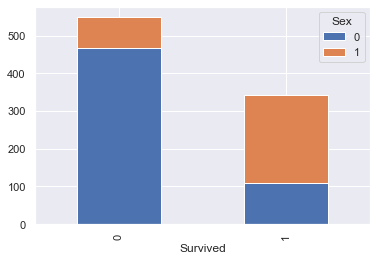

In [20]:
groupof = data.groupby('Survived')['Sex']
groupof.value_counts().unstack().plot(kind="bar",stacked="True")

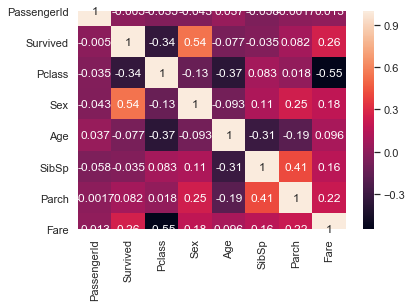

In [21]:
#plt.subplots(figsize = (15,8))
sns.set()
sns.heatmap(data.corr(), annot=True)

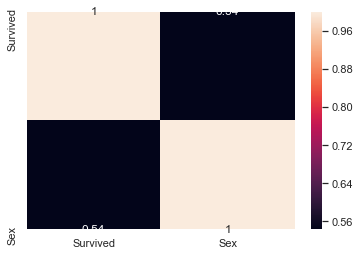

In [22]:
data1 = data[["Survived","Sex"]]

sns.set()
#plt.subplots(figsize = (15,8))
sns.heatmap(data1.corr(), annot=True)

In [23]:
gender_survived = pd.crosstab(data["Sex"],data["Survived"])

In [24]:
gender_survived.rename({
    0:"No",
    1:"Yes"
},axis=1 ,inplace = True)

In [25]:
gender_survived.rename({
    0:"Male",
    1:"Female"
},axis = 0,inplace= True)

In [26]:
gender_survived["total"] = gender_survived.sum(axis=1)

In [27]:
gender_survived = gender_survived.apply(lambda x:round(100*x/gender_survived["total"]))

In [28]:
gender_survived.drop("total",axis=1,inplace=True)

In [29]:
gender_survived

Survived,No,Yes
Sex,,
Male,81.0,19.0
Female,26.0,74.0


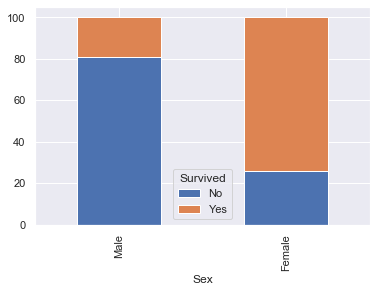

In [30]:
gender_survived.plot(kind = "bar", stacked= True)

In [31]:
gender_survived1 = pd.crosstab(data["Pclass"],data["Survived"])

In [32]:
data['Pclass'].unique()

array([3, 1, 2], dtype=int64)

In [33]:
gender_survived1

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


In [34]:
gender_survived1.rename({
    0:"No",
    1:"Yes"
},axis=1 ,inplace = True)

In [35]:
gender_survived1

Survived,No,Yes
Pclass,,
1,80,136
2,97,87
3,372,119


In [36]:
gender_survived1["total"] = gender_survived1.sum(axis=1)

In [37]:
gender_survived1

Survived,No,Yes,total
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491


In [38]:
gender_survived1 = gender_survived1.apply(lambda x:round(100*x/gender_survived1["total"]))

In [39]:
gender_survived1

Survived,No,Yes,total
Pclass,,,
1,37.0,63.0,100.0
2,53.0,47.0,100.0
3,76.0,24.0,100.0


In [40]:
gender_survived1.drop("total",axis=1,inplace=True)

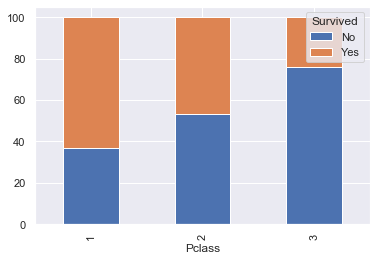

In [41]:
gender_survived1.plot(kind = "bar", stacked= True)

In [42]:
new_data = data.groupby(['Pclass',"Sex"])["Survived"].value_counts()

In [43]:
new_data

Pclass  Sex  Survived
1       0    0            77
             1            45
        1    1            91
             0             3
2       0    0            91
             1            17
        1    1            70
             0             6
3       0    0           300
             1            47
        1    0            72
             1            72
Name: Survived, dtype: int64

In [44]:
new_data["total"] = new_data.sum()

In [45]:
new_data

Pclass  Sex  Survived
1       0    0            77
             1            45
        1    1            91
             0             3
2       0    0            91
             1            17
        1    1            70
             0             6
3       0    0           300
             1            47
        1    0            72
             1            72
total                    891
Name: Survived, dtype: int64

In [46]:
new_data

Pclass  Sex  Survived
1       0    0            77
             1            45
        1    1            91
             0             3
2       0    0            91
             1            17
        1    1            70
             0             6
3       0    0           300
             1            47
        1    0            72
             1            72
total                    891
Name: Survived, dtype: int64

In [ ]:
new_data = new_data.apply(lambda x:round(100*x/new_data["total"]))

In [ ]:
new_data

In [ ]:
new_data= pd.DataFrame(new_data)

In [ ]:
new_data.columns

In [ ]:
#del new_data["total"]
new_data.plot(kind = "bar", stacked= True)


In [ ]:
new_data.sort_index(inplace=True)

In [ ]:
new_data

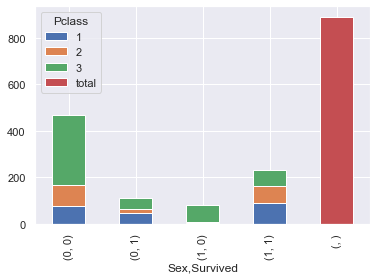

In [51]:
new_data.plot(kind = "bar", stacked= True)

In [ ]:
new_data.columns

In [ ]:
new_data.index

In [50]:
new_data = new_data.unstack(level='Pclass')

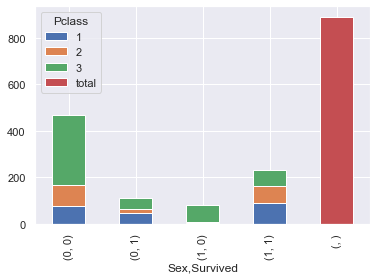

In [52]:
new_data.plot(kind = "bar", stacked= True)

In [59]:
from sklearn.linear_model import LogisticRegression

In [62]:
from sklearn.model_selection import train_test_split

In [63]:
model = LogisticRegression()

In [102]:
training_data = data[["PassengerId","Pclass","Fare"]]

In [103]:
output_data = data["Survived"]

In [104]:
x_train,x_test,y_train,y_test = train_test_split(training_data,output_data,test_size=0.3,random_state=42)

In [105]:
model.fit(x_train,y_train)

C:\Users\Acer\AppData\Local\Programs\Python\Python37-32\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [106]:
predictions = model.predict(x_test)

In [107]:
predictions

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 1], dtype=int64)

In [108]:
from sklearn.metrics import accuracy_score

In [109]:
score = accuracy_score(predictions,y_test)

In [110]:
score

0.6977611940298507

In [111]:
test_data = pd.read_csv("test.csv")

In [112]:
test_data = test_data[["PassengerId","Pclass","Fare"]]

In [113]:
test_data.isnull().sum()

PassengerId    0
Pclass         0
Fare           1
dtype: int64

In [114]:
output_data = data["Survived"]

In [115]:
test_data["Fare"] = test_data["Fare"].fillna(training_data["Fare"].mean())

In [116]:
test_data.isnull().sum()

PassengerId    0
Pclass         0
Fare           0
dtype: int64

In [117]:
tarining_data1 = test_data[["PassengerId","Pclass","Fare"]]

In [194]:
new_predictions = model.predict(tarining_data1)

In [195]:
new_predictions

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,

In [196]:
submission = {
    "PassengerId": test_data["PassengerId"],
    "Survived": new_predictions
    
}

In [197]:
submission

{'PassengerId': 0       892
 1       893
 2       894
 3       895
 4       896
        ... 
 413    1305
 414    1306
 415    1307
 416    1308
 417    1309
 Name: PassengerId, Length: 418, dtype: int64,
 'Survived': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
        1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
        1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
        0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0,
        0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
        0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
        0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
        0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,

In [198]:
submission = pd.DataFrame(submission)

In [199]:
submission

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [200]:
submission.set_index("PassengerId",inplace = True)

In [201]:
submission

,Survived
PassengerId,
892,0
893,0
894,0
895,0
896,0
...,...
1305,0
1306,1
1307,0


In [202]:
submission.to_csv("submission.csv")

In [203]:
submission

,Survived
PassengerId,
892,0
893,0
894,0
895,0
896,0
...,...
1305,0
1306,1
1307,0


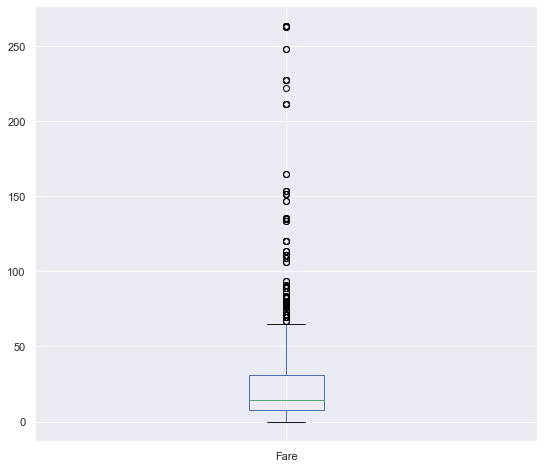

In [204]:
plt.figure(figsize=(9,8))
training_data["Fare"].plot(kind= "box")

In [150]:
training_data[training_data["Fare"]>400]

,PassengerId,Pclass,Fare
258,259,1,512.3292
679,680,1,512.3292
737,738,1,512.3292


In [172]:
training_data[training_data["Fare"]>400].replace({training_data["Fare"].mean()})

,PassengerId,Pclass,Fare
258,259,1,512.3292
679,680,1,512.3292
737,738,1,512.3292


In [208]:
tarining_data1["Fare"].mean()

35.61899954059467

In [209]:
tarining_data1.replace({512.3292:35.6271},inplace= True)

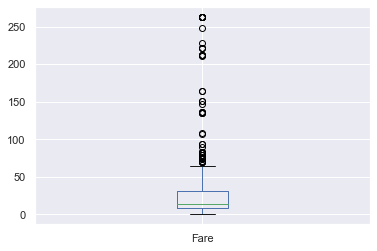

In [211]:
tarining_data1["Fare"].plot(kind="box")

In [212]:
testing_data = tarining_data1[["PassengerId","Pclass","Fare"]] 

In [213]:
pre =model.predict(testing_data)

In [214]:
pre

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,

In [227]:
submission1 = {
    "PassengerId": tarining_data1["PassengerId"],
    "Survived": pre
    
}

In [228]:
submission1 = pd.DataFrame(submission1)

In [229]:
submission1

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [231]:
submission1.set_index("PassengerId")

,Survived
PassengerId,
892,0
893,0
894,0
895,0
896,0
...,...
1305,0
1306,1
1307,0


In [232]:
submission1 = submission1.to_csv("submission1.csv")